In [16]:
import pandas as pd
from PIL import Image
import glob
import os
import random
 
def image_info(folder_path):
    data = []
    for filename in glob.glob(os.path.join(folder_path, "*")):
        if "_resized" in filename:
            continue
        try:
            img = Image.open(filename)
            width, height = img.size
            size_mb = os.path.getsize(filename) / (1024**2)
            resized_img = img.resize((width // 2, height // 2))
            resized_filename = os.path.splitext(filename)[0] + "_resized.jpg"
            resized_img.save(resized_filename)
            data.append(
                {
                    "filename": os.path.basename(filename),
                    "format": img.format,
                    "mode": img.mode,
                    "channels": len(img.getbands()),
                    "size_mb": f"{round(size_mb, 2)} mb",
                    "width": width,
                    "height": height,
                    "full_path": filename,
                    "resized_path": resized_filename,
                }
            )
        except OSError:
            pass

    df = pd.DataFrame(data)
    return df


def img_to_html(img_path):
    return f'<img src="{img_path}" width="200">'
 
data = image_info("imgaes")
HTML(data.to_html(formatters={"resized_path": img_to_html}, escape=False))

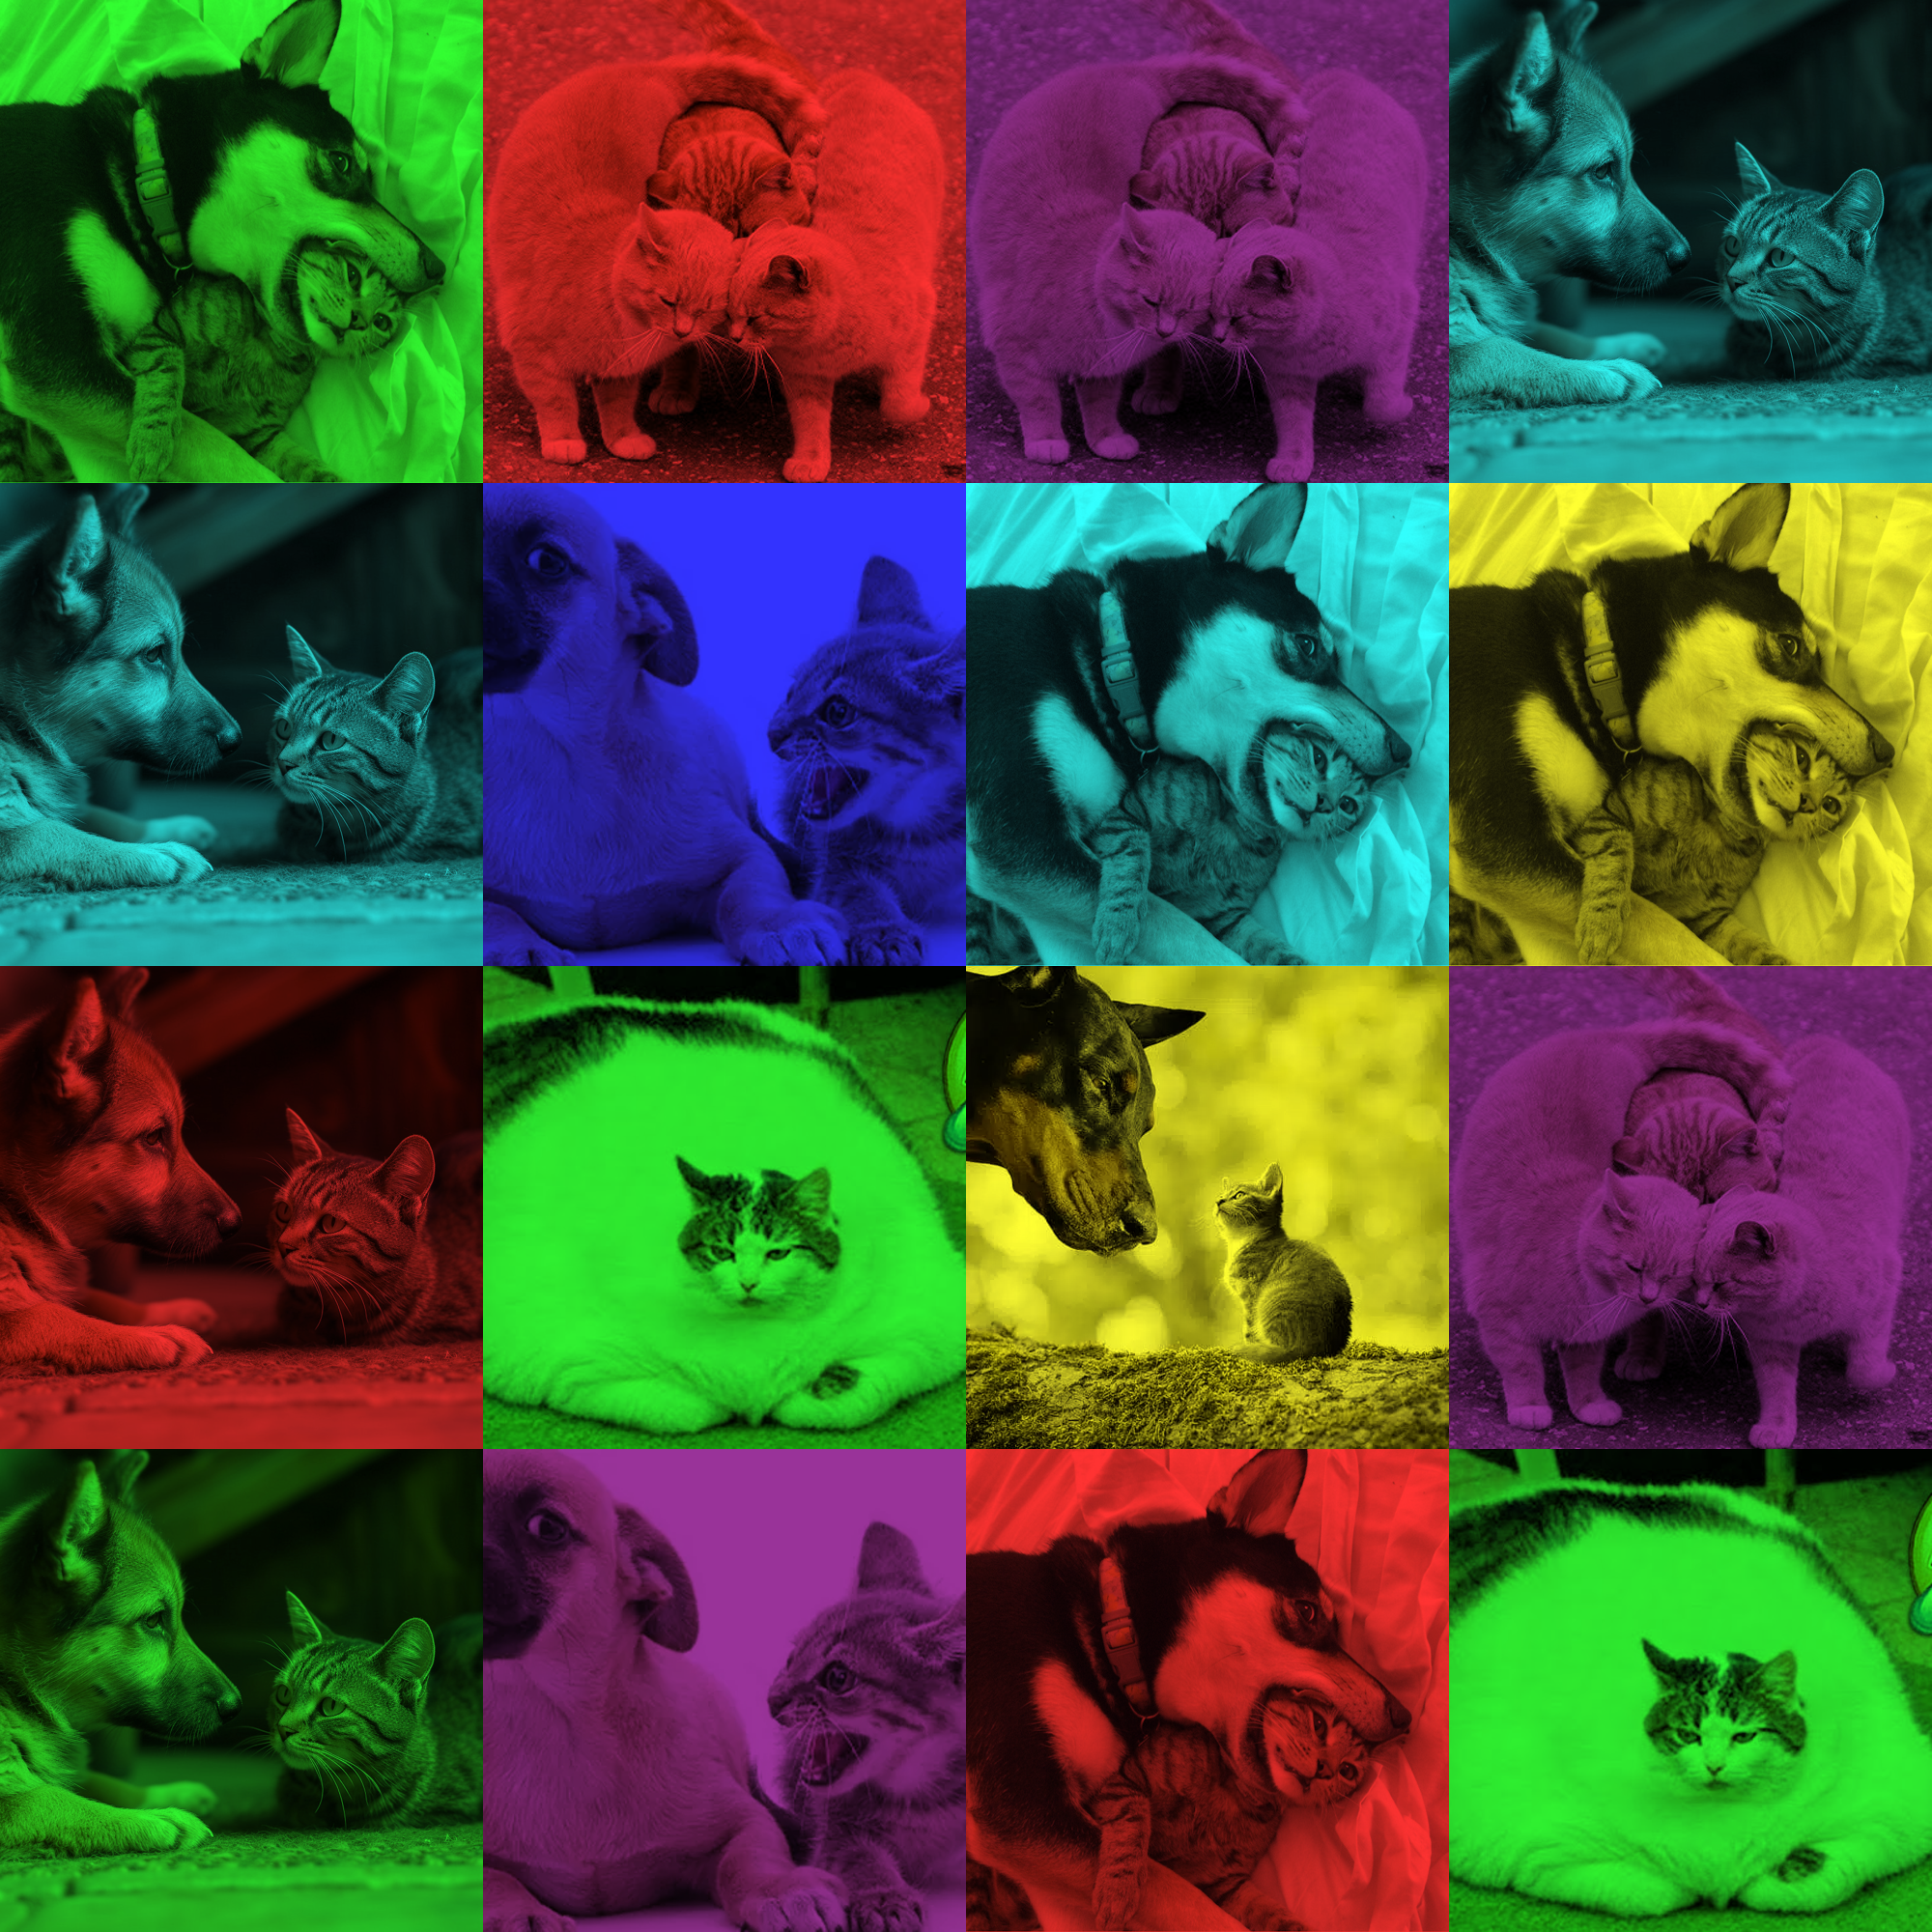

In [21]:
import pandas as pd
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import glob
import os
import random
from IPython.display import HTML

def add_random_filter(image):
    colors = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "purple": (128, 0, 128),
        "cyan": (0, 255, 255),
    }

    gray_img = image.convert("L") # luminance (gray filter)
    chosen_color = random.choice(list(colors.values()))

    return Image.blend(image, ImageOps.colorize(gray_img, (0, 0, 0), chosen_color), 0.8)


def make_poster(folder_path, output_filename, rows, cols, resize_size=500):

    images = image_info(folder_path)["full_path"]

    width, height = resize_size * cols, resize_size * rows
    poster_img = Image.new("RGB", (width, height), (255, 255, 255))

    # Заповнення постера зображеннями
    x, y = 0, 0
    for _ in range(rows):
        for _ in range(cols):
            img_path = random.choice(images)
            img = Image.open(img_path)

            # Обрізання до квадрата
            width, height = img.size
            min_size = min(width, height)
            left = (width - min_size) // 2
            top = (height - min_size) // 2
            right = left + min_size
            bottom = top + min_size

            img = add_random_filter(img.crop((left, top, right, bottom)).resize(
                (resize_size, resize_size)
            ))

            poster_img.paste(img, (x, y))
            x += resize_size
        x = 0
        y += resize_size

    poster_img.save(output_filename)
    return poster_img


poster = make_poster("imgaes", "poster3.jpg", 3, 3)
display(poster)